![](files/citypic.jpg)

# PYCON Canada 2018 
## Three Methods to Aggregate Subscriber's Interest

### By Abbas Taher
### GoFlek Inc.
### Saturday Nov 10th 2018

![](files/Company_Brief.JPG)

# AGENDA:

### a- Recipe \#1- Using Python Dictionary
   
### b- Short Overview of PySpark
      
### c- Recipe \#2- Using Apache Spark - GroupBy Transformation
      
### d- Recipe \#3- Using Apache Spark - ReduceBy Transformation

# ------------------------------------------------------

# Problem Statment: "Aggregate Interest by ID"
##  For Subscribers of an Online Magazine
## Aggregate each subscriber's interest/likes into a (key,value) pair in one record


### Original Data:

In [5]:
import pandas as pd
pd.set_option('display.max_rows',15)  # change preview settings

fname = './InterestData.csv'
subscrib_data = pd.read_csv(fname, delimiter =';')
subscrib_data

,ID,Interest
0,1001,Sports
1,1001,Techno
2,1001,Travel
3,1002,Auto
4,1002,Food
5,1002,Sports
6,1002,Techno
...,...,...
49,1018,Techno
50,1018,Travel


### Expected Output after Aggregating by ID:

In [6]:
subscrib_data = open('./InterestAggregated.csv', 'r')
for line in subscrib_data:
    id, interest = line.split(';')
    print(id,'; ', interest, end='') 

# Note: key = ID ; Interest = Long string with commas between each interest

ID ;  Interest
1001 ;  Sports, Techno, Travel
1002 ;  Auto, Food, Sports, Techno
1003 ;  Food
1004 ;  Auto, Food, Travel
1005 ;  Auto, Food, Techno
1006 ;  Food, Sports, Techno, Travel
1007 ;  Sports, Techno, Travel
1008 ;  Auto, Techno, Travel
1009 ;  Food, Travel
1010 ;  Auto, Food, Travel
1011 ;  Food,Sport
1012 ;  Auto, Food, Sports, Techno, Travel
1013 ;  Auto, Travel
1014 ;  Sports
1015 ;  Auto, Food
1016 ;  Auto, Food, Sports, Techno, Travel
1017 ;  Sports
1018 ;  Auto, Food, Techno, Travel
1019 ;  Food, Techno
1020 ;  Auto, Food, Travel


## RECIPE \#1: Using Python Dictionaries

In [7]:
import csv
from collections import defaultdict  

aggInterest = defaultdict(list)        # <-- dictionary <key,[list]>
header = None

# Read the file into a dictionary
with open('./InterestData.csv','r') as csvfile:  # read the file
    readCSV = csv.reader(csvfile, delimiter=';')
    header = next(readCSV)  
    for key_ID, interests in readCSV:            # loop over all records in file
        aggInterest[key_ID].append(interests)    # assign key & append value to list in 1 command

![](files/dictslide.JPG)

### If we write the content of the dictionary into a CSV file 

In [8]:
with open('./aggInterest.csv', 'w') as csvfile:         
    writeCSV = csv.writer(csvfile, delimiter=';')
    writeCSV.writerow(header)
    for idd, interest in aggInterest.items():
        writeCSV.writerow((idd,interest))

### then read the file ... this is is what we get ... python converted the list into a string 

In [9]:
text_file = open('./aggInterest.csv', 'r')
for line in text_file:
    print(line, end='')
print()    

ID;Interest

1001;['Sports', 'Techno', 'Travel']

1002;['Auto', 'Food', 'Sports', 'Techno']

1003;['Food']

1004;['Auto', 'Food', 'Travel']

1005;['Auto', 'Food', 'Techno']

1006;['Food', 'Sports', 'Techno', 'Travel']

1007;['Sports', 'Techno', 'Travel']

1008;['Auto', 'Techno', 'Travel']

1009;['Food', 'Travel']

1010;['Auto', 'Food', 'Travel']

1011;['Food', 'Sport']

1012;['Auto', 'Food', 'Sports', 'Techno', 'Travel']

1013;['Auto', 'Travel']

1014;['Sports']

1015;['Auto', 'Food']

1016;['Auto', 'Food', 'Sports', 'Techno', 'Travel']

1017;['Sports']

1018;['Auto', 'Food', 'Techno', 'Travel']

1019;['Food', 'Techno']

1020;['Auto', 'Food', 'Travel']




## This is not quite what we wanted.
### We wanted to save interests for each key as a long string rather than as a list 
### So lets 'join' each list of interests together ...

In [10]:
with open('./aggInterest_Good.csv', 'w') as csvfile:         
    writeCSV = csv.writer(csvfile, delimiter=';')
    writeCSV.writerow(header)
    for id, interestLst in aggInterest.items(): #  <-- loop over the dictionary
        interest = ",".join(interestLst)        #  <-- join the list into a long string
        writeCSV.writerow((id,interest))

## This is better ... 

In [11]:
text_file = open('./aggInterest_Good.csv', 'r')
for line in text_file:
    print(line, end='')

ID;Interest

1001;Sports,Techno,Travel

1002;Auto,Food,Sports,Techno

1003;Food

1004;Auto,Food,Travel

1005;Auto,Food,Techno

1006;Food,Sports,Techno,Travel

1007;Sports,Techno,Travel

1008;Auto,Techno,Travel

1009;Food,Travel

1010;Auto,Food,Travel

1011;Food,Sport

1012;Auto,Food,Sports,Techno,Travel

1013;Auto,Travel

1014;Sports

1015;Auto,Food

1016;Auto,Food,Sports,Techno,Travel

1017;Sports

1018;Auto,Food,Techno,Travel

1019;Food,Techno

1020;Auto,Food,Travel



### In the next few Jupyter paragraphs we shall do the same using PySpark

# Short Overview of Apache Spark

## Apache Spark is an open-source distributed general-purpose cluster-computing framework.

### * Initially started by Matei Zaharia at UC Berkeley's AMPLab in 2009, and open sourced in 2010
###  *  In November 2014, Spark founder M. Zaharia's company Databricks set a new world record in large scale sorting using Spark

### *  1000+ contributors in 2015, making it one of the most active projects in the Apache Software Foundation

### -----------------
## General Features:
### - Unified API in Scala, Python, Java and R
### - Data Abstractions: RDD (resilient distributed dataset), DataFrame, Dataset
### - Operation Abstraction: Transformations & Actions

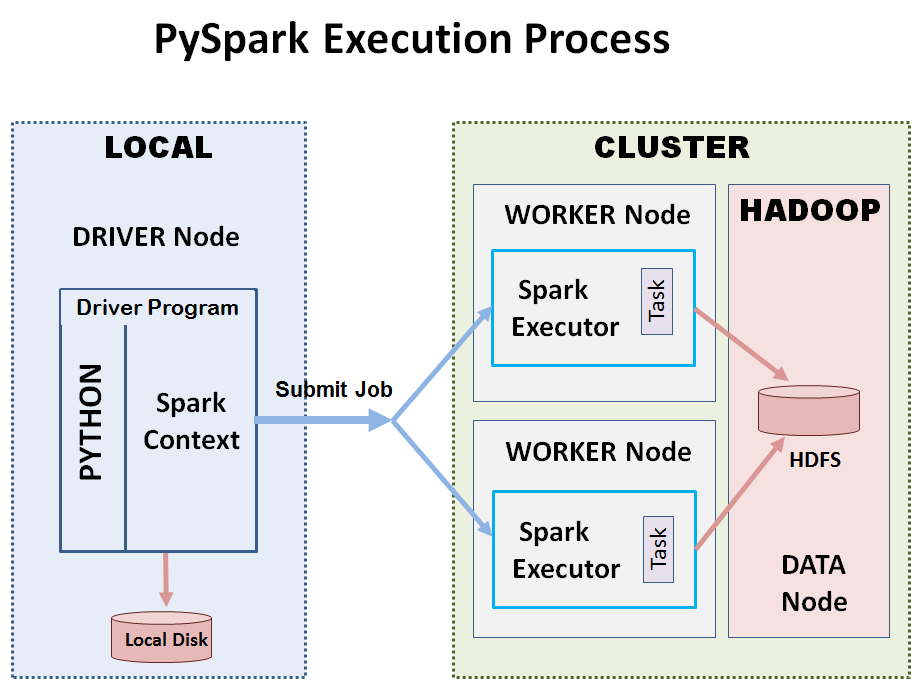

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "PySpark_Execution_Process.png", width=750, height=700)

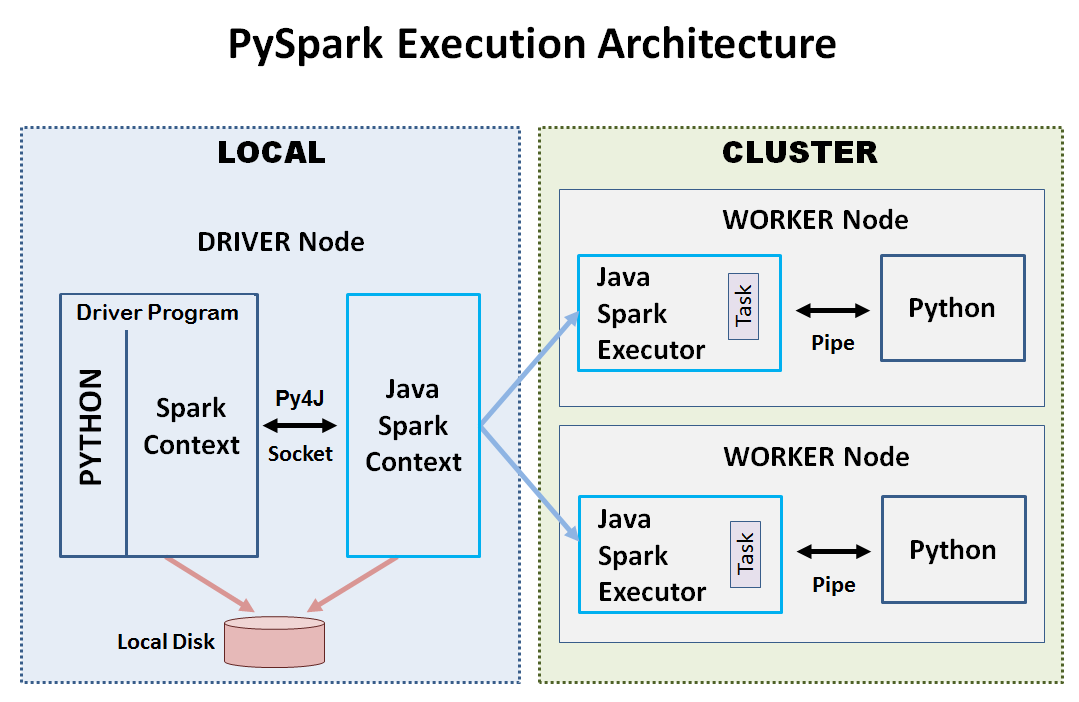

In [13]:
Image(filename ="PySpark_Execution_Architecture.png", width=800, height=750)

## RECIPE \#2: Using Apache Spark - GroupBy Transformation
### 1- Read Subsscriber Interest only data 
### 2- Use groupByKey to merge interest 
### 3- Convert the group-by list into a long string


In [14]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config("spark.master", "local").appName("PythonCSV").getOrCreate()

file = "./InterestData.csv"

# read csv file includes header into a dataframe
dataframe = spark.read.csv(file, sep=";", inferSchema="true", header=True)

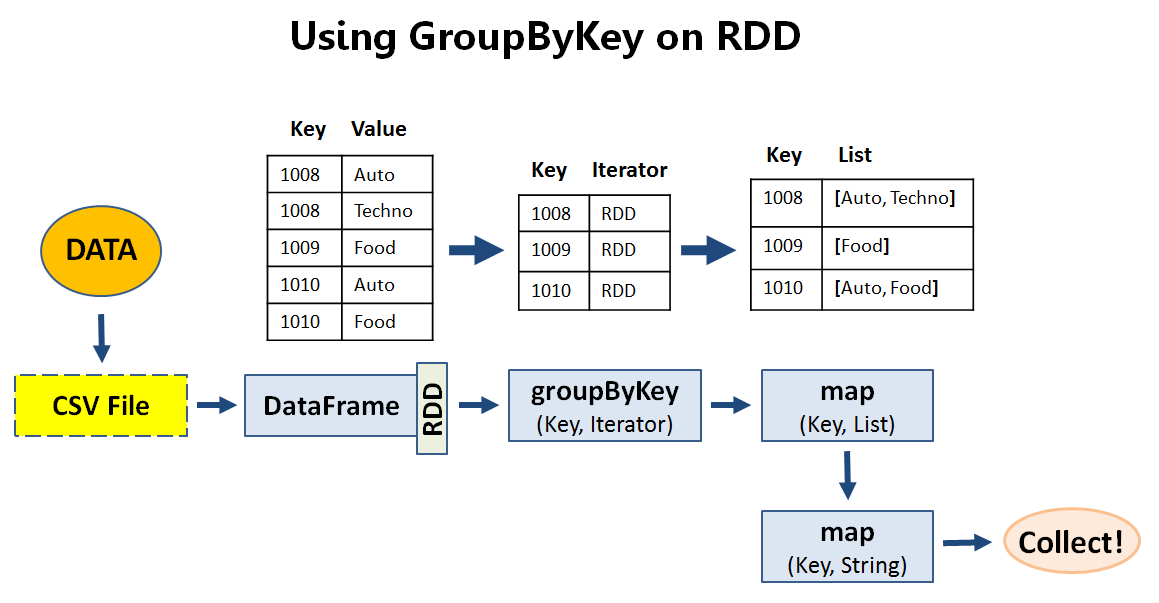

In [15]:
Image(filename ="Using_GroupByKey.png", width=1000, height=900)

In [16]:
rdd1 = dataframe.rdd.groupByKey()

# to convert groupByKey() iterable into an actual list of strings (interest)
rdd2 = rdd1.map(lambda pair : (pair[0], list(pair[1])))

rdd3 = rdd2.map(lambda pair: (pair[0], (",".join(pair[1])) )) # convert list -> long string

for row in rdd3.collect():
    print(row)

print('\n',rdd1.collect()[0])  # just to show that the groupBy returned an iterator

spark.stop()

(1001, 'Sports,Techno,Travel')
(1002, 'Auto,Food,Sports,Techno')
(1003, 'Food')
(1004, 'Auto,Food,Travel')
(1005, 'Auto,Food,Techno')
(1006, 'Food,Sports,Techno,Travel')
(1007, 'Sports,Techno,Travel')
(1008, 'Auto,Techno,Travel')
(1009, 'Food,Travel')
(1010, 'Auto,Food,Travel')
(1011, 'Food,Sport')
(1012, 'Auto,Food,Sports,Techno,Travel')
(1013, 'Auto,Travel')
(1014, 'Sports')
(1015, 'Auto,Food')
(1016, 'Auto,Food,Sports,Techno,Travel')
(1017, 'Sports')
(1018, 'Auto,Food,Techno,Travel')
(1019, 'Food,Techno')
(1020, 'Auto,Food,Travel')

 (1001, <pyspark.resultiterable.ResultIterable object at 0x00000062349B7C88>)


## RECIPE \#3: Using Apache Spark - ReduceBy Transformation
### 1- Read Subsscriber Interest only data 
### 2- Use ReduceByKey to merge interest 
### 3- Convert the interest value list into a long string


In [17]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config("spark.master", "local").appName("PythonCSV").getOrCreate()

file = "./InterestData.csv"

# read csv file includes header into a dataframe
dataframe = spark.read.csv(file, sep=";", inferSchema="true", header=True)


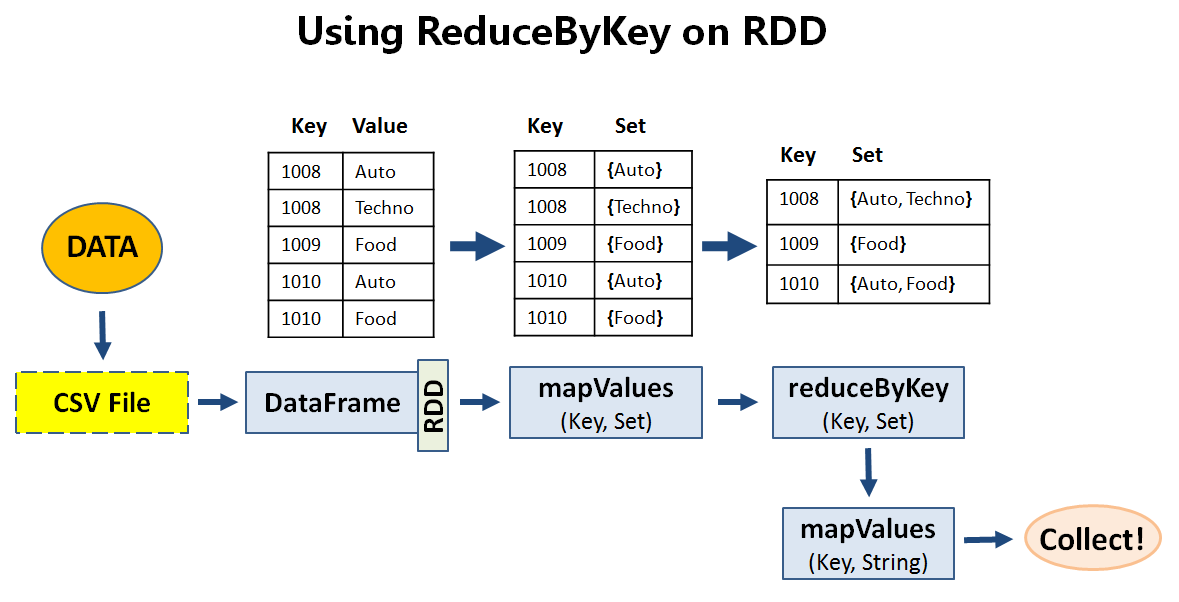

In [18]:
Image(filename ="Using_ReduceByKey.png", width=1000, height=900)

In [19]:
# Convert value part -> Set('Interest') using mapValues
# Make a union of all Sets belonging to same key using reduceByKey
rdd1 = dataframe.rdd.mapValues(lambda interest: {interest})\
                .reduceByKey(lambda s1, s2: s1.union(s2))  

rdd3 = rdd1.mapValues(lambda sett: ((",".join(sett)) )) # convert value part -> long string

for row in rdd3.collect():
    print(row)

spark.stop()

(1001, 'Techno,Sports,Travel')
(1002, 'Auto,Techno,Sports,Food')
(1003, 'Food')
(1004, 'Auto,Food,Travel')
(1005, 'Auto,Techno,Food')
(1006, 'Food,Techno,Sports,Travel')
(1007, 'Techno,Sports,Travel')
(1008, 'Auto,Techno,Travel')
(1009, 'Food,Travel')
(1010, 'Auto,Food,Travel')
(1011, 'Sport,Food')
(1012, 'Auto,Sports,Food,Techno,Travel')
(1013, 'Auto,Travel')
(1014, 'Sports')
(1015, 'Auto,Food')
(1016, 'Auto,Sports,Food,Techno,Travel')
(1017, 'Sports')
(1018, 'Auto,Techno,Food,Travel')
(1019, 'Food,Techno')
(1020, 'Auto,Food,Travel')


## NOTES:
### * Using reduceByKey is better than GroupBy because of the smaller shuffle size. When using redyceByKey aggregation occurs early in the transformation whereas in GroupByKey all data is transfered within the cluster during the shuffle stage.

### * Using Set {} in reduceByKey is better because it eleminate duplicate in (ID,Interest) pairs if there are any in InterestData.csv file.

### * Using mapValues is better than using map when the key stays the same after a transformation.

### https://github.com/abbas-taher/PyCon-Canada-2018
### abbas@goflek.com

### Thank You